<a href="https://colab.research.google.com/github/JeremyKvale/Getting-Started-with-GitHub-Markdown-and-LaTeX/blob/main/Pivot_Point_Driven_Pendulum_Jeremy_Kvale_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pivot Point Driven Pendulum
The purpose of this experiment is to simulate and analyze a pendulum's movement when driven by a pivot point moving in a circle. The goal is to find some way to stabilize the pendulum bob (e.g. no movement; staying in the middle of the pivot point's circle).

# Pseudocode:

1. **Import Packages/Modules:**
  - `math`
  - `numpy` as `np`
  - `scipy.integrate` for `solve_ivp`
  - `matplotlib.pyplot` as `plt`
  - `matplotlib.animate` for animation to show the pendulum motion
  - from `matplotlib.animation` import `FuncAnimation`
  - from `IPython.display` import `HTML`

2. **Define Equation of Motion:**
  - Define our function `pivot_driven_pendulum(t, y, omega_d, omega_0=1, gamma=0, x_p0=1, y_p0=1)`
  - `t` is time
  - `y` is state variable
  - `omega_d` is the frequency of the driven pivot point
  - `omega_0` is the natural frequency, sqrt(g/l)
  - `gamma` is the damping coefficient
  - `x_p0` and `y_p0` are the initial positions; could be replaced with l; they are also defined as the maximum deflection values for the pivot point
  - We could also replace `omega_0=1` with `g=1, l=1`
  - The equation for motion is: $\ddot{\theta} + 2\gamma\dot{\theta} + \omega_0^2sin(\theta) - \omega_d^2[cos(\omega_d t)sin(\theta) - sin(\omega_d t)cos(\theta)] = 0$

3. **Define Utilities:**
  - `get_pivot_xy(t, omega_d, x_p0, y_p0)` function for getting the position of the pivot point; gives `x_pivot` and `y_pivot`
  - `get_pendulum_xy(t, theta, l)` function for getting the position of the pendulum bob in reference to the pivot point; gives `x_pendulum` and `y_pendulum`
  - `get_lab_xy(x_p, y_p, x_pendulum, y_pendulum)` function for getting the position of the pendulum bob in the lab frame (not dependent on the pivot point); gives `x_lab` and `y_lab`
  - `basic_plot(t, y, xlabel=None, ylabel=None, figsize=(3,3))` gives a basic formatted plot

4. **Solve Equation of Motion:**
  - Define initial conditions `y_0=[theta_0, ang_vel_0]`
  - Define time span `t_span = [t_min, t_max]`
  - Define constants `omega_d`
  - Use `solve_ivp` with the `radua` method

5. **Plot:**
  - Using our `basic_plot` function to graph the angle theta as a function of time
  - We want our graph to have the same period as our pivot point

6. **Animate:**
  - `def create_pendulum_animation(t, x_pivot, y_pivot, x_lab, y_lab, l=1, show_traj=False, speed_factor=1.0)` function for obtaining the values we found needed for animation; setting up animation
  - `anim = FuncAnimation(fig, animate, frames=len(t), interval=interval, blit=True)` function for creating the animation of the pendulum bob


In [ ]:
# 1. Import Packages/Modules

import math
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
# 2. Define Equations of Motion

def pivot_driven_pendulum(t, y, omega_d, gamma=0, omega_0=1, x_p0=1, y_p0=1):
  """
This defines our pendulum's motion
t is time
y is state variable
omega_d is the frequency of the driven pivot point
omega_0 is the natural frequency, sqrt(g/l)
gamma is the damping coefficient
x_p0 and y_p0 are the initial positions of the pivot point, and `1` could be replaced with `l` - the length of the pendulum rod
  """
  theta, ang_vel = y # Unpacking our state variable `y`
  return [ang_vel, -2*gamma*ang_vel - omega_0**2*math.sin(theta) - omega_d**2*(math.cos(omega_d*t)*math.sin(theta) - math.sin(omega_d*t)*math.cos(theta))]

In [ ]:
# 3. Define Utilities

def get_pivot_xy(t, omega_d, x_p0, y_p0):
  """
This allows us to obtain the position of the pivot point
t is time
omega_d is the frequency of the driven pivot point
x_p0 and y_p0 are the initial positions of the pivot point
  """
  x_pivot = x_p0*np.cos(omega_d*t) # Gives us the x-position for the pivot point
  y_pivot = y_p0*np.sin(omega_d*t) # Gives us the y-position for the pivot point
  return x_pivot, y_pivot

def get_pendulum_xy(t, theta, l):
  """
This allows us to obtain the position of the pendulum bob in reference to the pivot point
t is time
theta is the angle of the pendulum bob
l is the length of the pendulum rod
  """
  x_pendulum = l*np.sin(theta) # Gives us the x-position for the pendulum bob
  y_pendulum = -l*np.cos(theta) # Gives us the y-position for the pendulum bob
  return x_pendulum, y_pendulum

def get_lab_xy(x_p, y_p, x_pendulum, y_pendulum):
  """
This allows us to obtain the position of the pendulum bob in the lab frame (not dependent on the pivot point)
x_p and y_p are the position of the pivot point
x_pendulum and y_pendulum are the position of the pendulum bob in reference to the pivot point given by get_pendulum_xy()
  """
  x_lab = x_p + x_pendulum # Gives us the x-position for the pendulum bob in the lab frame
  y_lab = y_p + y_pendulum # Gives us the y-position for the pendulum bob in the lab frame
  return x_lab, y_lab

def basic_plot(t, y, xlabel=None, ylabel=None, figsize=(3,3)): # Gives us a basic formatted plot
  plt.figure(figsize=figsize)
  plt.plot(t, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return plt.show()

In [ ]:
# 4. Solve Equations of Motion

# Define initial conditions
x_p0 = 1 # Initial x-position of the pivot point
y_p0 = 1 # Initial y-position of the pivot point
l = 1 # Length of the pendulum rod
theta_0 = 3*np.pi/2 # Initial angle
ang_vel_0 = -.1 # Initial angular velocity
y_0 = [theta_0, ang_vel_0]

t_min = 0 # Start time
t_max = 50 # End time
t_span = [t_min, t_max] # Define time span

# Define constants
omega_d = .8 # Frequency of driven pivot point

# Solve the ODE
sol = scipy.integrate.solve_ivp(pivot_driven_pendulum, t_span, y_0, args=(omega_d,), dense_output=True, method='Radau')

# Extract the results
t = sol.t
y = sol.y

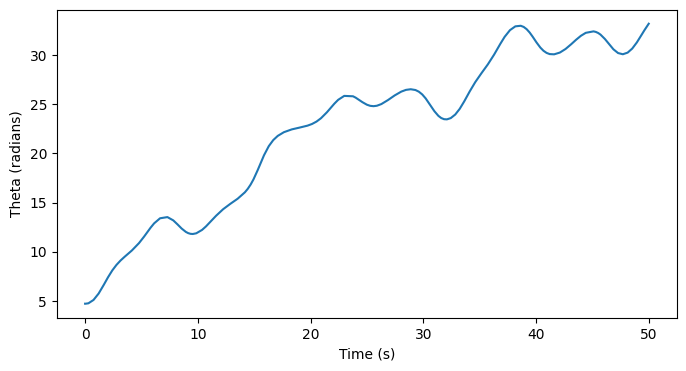

In [ ]:
# 5. Plot

# Extract theta values from the solution
theta = sol.y[0]

# Plot theta as a function of time
basic_plot(t, theta, xlabel='Time (s)', ylabel='Theta (radians)', figsize=(8, 4)) # The angle is measured in radians, not degrees

In [ ]:
# 6A. Animate Set-Up

def create_pendulum_animation(t, x_pivot, y_pivot, x_lab, y_lab, l=1, show_traj=False, speed_factor=1.0):
    """
    Creates an animation of the pivot-driven pendulum.

    PARAMETERS:
    t : ndarray
        Time array.
    x_pivot : ndarray
        x-positions of the pivot over time.
    y_pivot : ndarray
        y-positions of the pivot over time.
    x_lab : ndarray
        x-positions of the pendulum bob in the lab frame over time.
    y_lab : ndarray
        y-positions of the pendulum bob in the lab frame over time.
    l : float, optional
        pendulum length (default is 1).
    show_traj : bool, optional
        toggle showing the trajectory of the pendulum bob (default is False).
    speed_factor : float, optional
        factor to scale the animation speed (default is 1.0).
        a value > 1.0 slows down the animation, < 1.0 speeds it up.

    RETURNS:
    anim : FuncAnimation
        matplotlib animation object.
    """
    fig, ax = plt.subplots(figsize=(4, 4)) # Increased figure size
    ax.set_xlim(np.min(x_pivot) - l, np.max(x_pivot) + l)
    ax.set_ylim(np.min(y_pivot) - l, np.max(y_pivot) + l)
    # ax.set_aspect('equal', adjustable='box')
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Initialize plot elements
    pivot, = ax.plot([], [], 'o', color='black', markersize=8, label='Pivot')
    pendulum_arm, = ax.plot([], [], '-', color='black', lw=2, label='Pendulum Arm')
    pendulum_bob, = ax.plot([], [], 'o', color='red', markersize=12, label='Pendulum Bob')
    trajectory = None # Initialize trajectory to None

    if show_traj:
        trajectory, = ax.plot([], [], '-', color='gray', lw=1, alpha=0.5, label='Trajectory') # Add trajectory line

    def animate(i):
        # Update the positions of the plot elements
        pivot.set_data([x_pivot[i]], [y_pivot[i]]) # Pass as sequences
        pendulum_arm.set_data([x_pivot[i], x_lab[i]], [y_pivot[i], y_lab[i]])
        pendulum_bob.set_data([x_lab[i]], [y_lab[i]]) # Pass as sequences

        artists = [pivot, pendulum_arm, pendulum_bob] # List of artists to update

        if show_traj and trajectory:
             trajectory.set_data(x_lab[:i+1], y_lab[:i+1]) # Update trajectory data
             artists.append(trajectory) # Add trajectory to the list of artists

        return artists # Return all updated artists

    # Create the animation
    # Adjust the interval based on the average time step in t
    # This aims to make the animation speed consistent with the simulation time
    average_time_step = np.mean(np.diff(t))
    # Scale the interval by the speed_factor
    interval = average_time_step * 1000 * speed_factor # Convert to milliseconds and apply speed_factor.

    anim = FuncAnimation(fig, animate, frames=len(t), interval=interval, blit=True)
    plt.close(fig) # Close the initial figure to prevent it from displaying

    return anim

In [ ]:
# 6B. Animation

n_points = 300 # Number of frames
t_plot = np.linspace(t_min, t_max, n_points)
theta_plot = sol.sol(t_plot)[0] # Requires `dense_output=True` in `solve_ivp`
x_pivot, y_pivot = get_pivot_xy(t_plot, omega_d, x_p0, y_p0) # Pivot coordinates
x_pendulum, y_pendulum = get_pendulum_xy(t_plot, theta_plot, l) # Pendulum coordinates of pendulum (referenced to pivot point)
x_lab, y_lab = get_lab_xy(x_pivot, y_pivot, x_pendulum, y_pendulum) # Pendulum coordinates in the lab frame

# Animation Flags/Parameters
show_traj = True # True --> show trajectory; False --> do not show trajectory
speed_factor = 5 # >1 --> slow down animation; <1 --> speed up animation

# Create_pendulum_animation
pendulum_animation = create_pendulum_animation(t_plot, x_pivot, y_pivot, x_lab, y_lab, show_traj=show_traj, speed_factor=1) # Creates animation object with trajectory shown
HTML(pendulum_animation.to_html5_video()) # Display animation

## **Stability Analysis:**
Through testing multiple combinations of initial conditions, I found that a few different things:
- As omega_d approaches zero, the pendulum bob reaches a stiff state where the movement of the pivot point is almost negligible, resulting in a stationary pendulum bob (with no initial angle or angular velocity). This is of course expected, since no inputs whatsoever should yield no meaningful outputs.
- As omega_d increases, the pendulum bob's chance of finding any stability decreases significantly (once again with no initial angle or angular velocity). This is also expected.
- At an angular velocity of 8 and an omega_d of 5, the pendulum bob swings around like it would for any other combination, but there was also a consistent freeze every period where it stopped and balanced right on top of the pivot point. It's not the desired solution, but it is certainly closer.
- At an initial angular velocity of 100 and an omega_d of 95, the pendulum bob draws a perfect circle at a constant angular velocity.
- At an initial angular velocity of 50 and an omega_d of 47, the pendulum seems to teleport all around..... no meaningful results here.....
- Because of the way I did this assignment and set up my functions, I have to have an initial angle of 3pi/2, where the pivot point starts to the right of the center and the bob at the middle.
- Having a negative angular velocity would yield a fairly stable first few seconds, but usually went away quickly.

## Conclusion
Based on what I've seen, it seems that the closest I can get to a solution with my current code and understanding is the case with no initial angle or angular velocity and with an omega_d close to zero. In general, this seems to be the case that higher omega_d values usually yield instability and vice versa, unless counteracted with a greater and opposite angular velocity. I know we did work in class with an epsilon term that represented some region close to the center of the circle. When we used this epsilon term, we were able to find a solution (or at least pretty dang close) where the pendulum bob stayed almost exactly in the middle with very minimal movement. I also believe that adding work-force relations into the mix would help, as part of the problem hinges on the fact that the pivot point being driven is constantly adding energy into the system.